## Polytope Extremes-DT example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots with a specific domain.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
!python3 ../desp-authentication.py -u <user_name> -p <password>

This will generate a token that can then be used by earthkit and polytope.

You can also run the script without arguments to enter your username and password.

In [ ]:
!python3 ../desp-authentication.py

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

In [ ]:
import earthkit.data
import earthkit.plots
import earthkit.regrid

# This request matches a single parameter of the extremes DT, at 4km resolution
# which began production on 2023-12-11

request = {
        "class": "d1",
        "expver": "0001",
        "stream": "oper",
        "dataset": "extremes-dt",
        "date": "-5",
        "time": "0000",
        "type": "fc",
        "levtype": "sfc",
        "step": "0",
        "param": "167"
    }

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)


In [16]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20241121,0,0,fc,None,reduced_gg


In [17]:
data.to_xarray(engine='cfgrib')

<xarray.Dataset> Size: 526MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, values: 26306560)
Coordinates:
  * time               (time) datetime64[ns] 8B 2024-11-21
  * step               (step) timedelta64[ns] 8B 00:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
    latitude           (values) float64 210MB ...
    longitude          (values) float64 210MB ...
    valid_time         (time, step) datetime64[ns] 8B ...
Dimensions without coordinates: values
Data variables:
    t2m                (time, step, heightAboveGround, values) float32 105MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-26T10:38 GRIB to CDM+CF via cfgrib-0.9.1...

In [23]:
# regrid to 1x1 degree
out_grid = {"grid": [0.1,0.1]}
data_interpolated = earthkit.regrid.interpolate(data, out_grid=out_grid, method="linear")

20c4bdad03979c503641d23c08b376d125b4b23dfbc69c0c0f54beedfc846dbc.npz:   0%|          | 0.00/123M [00:00<?, ?B/…

In [24]:
data_interpolated.to_xarray(engine='cfgrib')

<xarray.Dataset> Size: 26MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 1801,
                        longitude: 3600)
Coordinates:
  * time               (time) datetime64[ns] 8B 2024-11-21
  * step               (step) timedelta64[ns] 8B 00:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 14kB 90.0 89.9 89.8 ... -89.9 -90.0
  * longitude          (longitude) float64 29kB 0.0 0.1 0.2 ... 359.8 359.9
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 26MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-26T10:39 GRIB to CDM+CF via cfgrib-0.9.1...

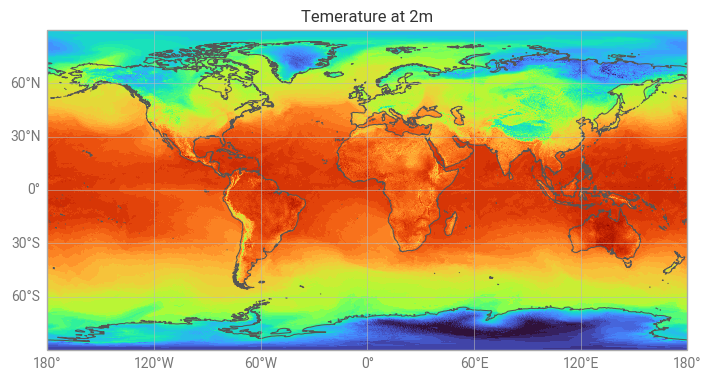

In [25]:
chart = earthkit.plots.Map()
chart.plot(
    data_interpolated[0]
)

chart.title("Temerature at 2m")
chart.coastlines()
chart.gridlines()
chart.show()

Now we will plot a specific area using earthkit-plots. In this case we will plot the data we have retrieved over Europe.

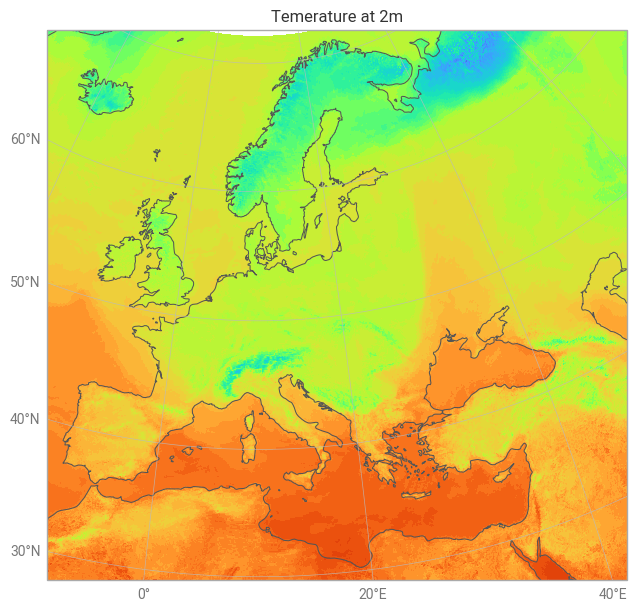

In [26]:
chart = earthkit.plots.Map(domain="Europe")
chart.plot(
    data_interpolated[0]
)

chart.title("Temerature at 2m")
chart.coastlines()
chart.gridlines()
chart.show()